In [8]:
%pip install pandas requests
import requests
import pandas as pd
from datetime import datetime

# 1. load data from Binance API
url = "https://api.binance.com/api/v3/ticker/price"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

# 2. Standard display
print("--- First 5 rows ---")
display(df.head())

print("\n--- Data types info ---")
df.info()

# ---------------------------------------------------------
# Data Quality Check
# ---------------------------------------------------------

print("\n🔍 DETAILED ANALYSIS:")

# 3. Missing Values (Null Values)
missing_count = df.isnull().sum()
print("\n1. Missing values (Null Values) per column:")
print(missing_count[missing_count > 0]) # Shows only columns that actually have errors
if missing_count.sum() == 0:
    print("-> ✅ No missing values found (Dataset is complete).")

# 4. Duplicates
duplicates = df.duplicated().sum()
print(f"\n2. Complete duplicates (Duplicate rows): {duplicates}")

# IMPORTANT: Check for duplicate "Primary Keys" (Symbols)
# For example, BTCUSDT should not appear twice.
symbol_duplicates = df['symbol'].duplicated().sum()
print(f"   Duplicate symbols (should be 0): {symbol_duplicates}")

# 5. Unique Values 
# How many different currencies are there? How many different prices?
unique_counts = df.nunique()
print("\n3. Number of unique values (Unique Values):")
print(unique_counts)


[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
--- First 5 rows ---


,symbol,price
0,ETHBTC,0.03011000
1,LTCBTC,0.00077100
2,BNBBTC,0.00987000
3,NEOBTC,0.00004170
4,QTUMETH,0.00046530



--- Data types info ---
<class 'pandas.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   symbol  3497 non-null   str  
 1   price   3497 non-null   str  
dtypes: str(2)
memory usage: 54.8 KB

🔍 DETAILED ANALYSIS:

1. Missing values (Null Values) per column:
Series([], dtype: int64)
-> ✅ No missing values found (Dataset is complete).

2. Complete duplicates (Duplicate rows): 0
   Duplicate symbols (should be 0): 0

3. Number of unique values (Unique Values):
symbol    3497
price     2571
dtype: int64


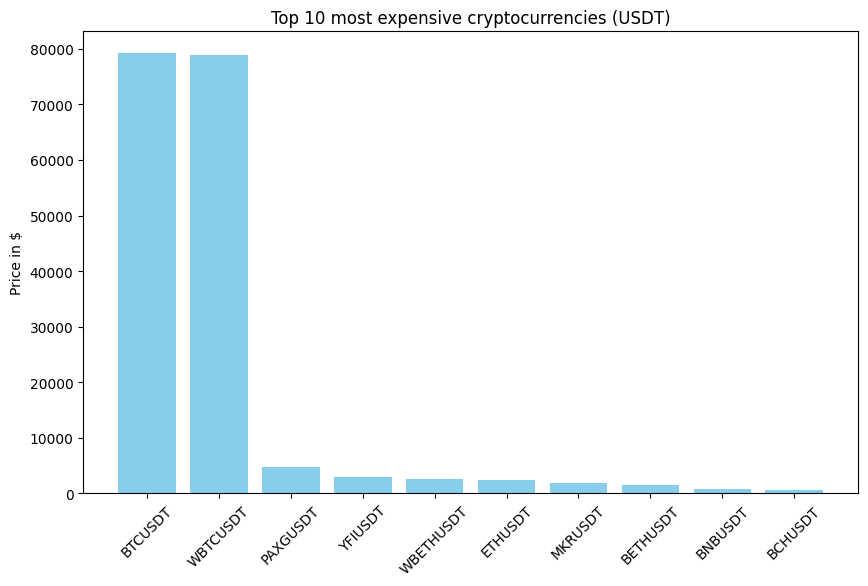

In [7]:
import matplotlib.pyplot as plt

# top 10 most expensive cryptocurrencies in USDT
top_10 = df_usdt.head(10)

# create a bar chart
plt.figure(figsize=(10, 6)) 
plt.bar(top_10['symbol'], top_10['price'], color='skyblue')
plt.title('Top 10 most expensive cryptocurrencies (USDT)')
plt.ylabel('Price in $')
plt.xticks(rotation=45) 
plt.show()

## 🏆 Analysis: Top 10 Highest Priced Assets

### 🔍 Visual Overview
This bar chart ranks the top 10 cryptocurrency pairs by their absolute price per unit (in USDT). It provides a clear view of the "premium" segment of the market.

### 💡 Key Insights
1.  **The "Bitcoin Standard":**
    * **BTCUSDT** (Bitcoin) and **WBTCUSDT** (Wrapped Bitcoin) are in a league of their own, trading near **$80,000**.
    * The bars are almost identical in height, confirming that WBTC effectively tracks the price of Bitcoin.
2.  **The Massive Gap:**
    * There is a dramatic drop-off between rank 2 and rank 3. The price crashes from ~$80,000 down to below **$5,000** (PAXG).
3.  **Ethereum Context:**
    * Even Ethereum (ETH), despite being the second most important cryptocurrency by market cap, has a significantly lower *unit price* (~$2,500) compared to Bitcoin.



In [16]:
%pip install plotly nbformat

df_sorted = df_usdt.sort_values(by='price', ascending=False).reset_index(drop=True)

import plotly.express as px

# use sorted dataframe
# logarithmic scale for better visibility
fig = px.scatter(df_sorted, 
                 x=df_sorted.index, 
                 y='price', 
                 hover_name='symbol',  
                 title='Interactive Price Distribution (Logarithmic Scale)',
                 labels={'index': 'Currency Rank', 'price': 'Price in USDT'},
                 color='price', 
                 log_y=True)    

fig.show()


[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 📊 Analysis: Cryptocurrency Price Distribution

### 🔍 Visual Overview
The scatter plot above illustrates the price distribution of all USDT trading pairs on Binance.
**Note:** A **logarithmic scale** was applied to the Y-axis to simultaneously visualize high-value assets (like Bitcoin) and micro-cap assets within the same chart.

### 💡 Key Insights
1.  **The "King" (Extreme Outlier):**
    * Bitcoin (BTC) is isolated at the very top (~$79,000+), dominating the market price structure.
2.  **The Power Law:**
    * There is a steep drop-off within the top ranks. Only a handful of assets trade above $1,000.
3.  **The "Middle Class":**
    * The linear descent in the middle section indicates that the vast majority of established altcoins trade between **$0.10 and $10.00**.
4.  **Micro-Values:**
    * The tail of the distribution (bottom right) contains assets priced significantly below **$0.0001** (e.g., Meme coins with high circulating supply).

